# CREDIT CARD FRAUD DETECTION

In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\spoor\\Downloads\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

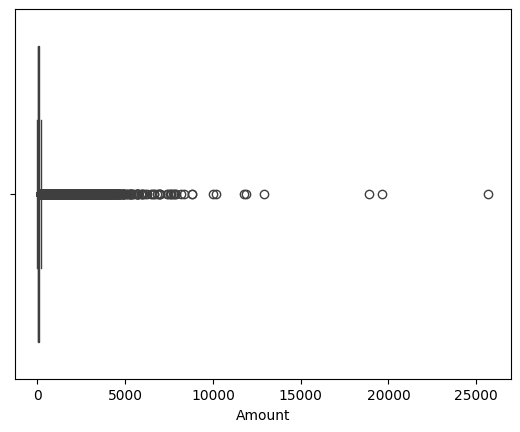

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Amount'])
plt.show()


In [5]:
x=df.drop("Class",axis=1)
y=df['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# using decision tree

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [8]:
from sklearn.tree import DecisionTreeClassifier
cl=DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4
)
cl.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
y_pred=cl.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.9994557775359011

In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[56852,    12],
       [   19,    79]])

<Axes: >

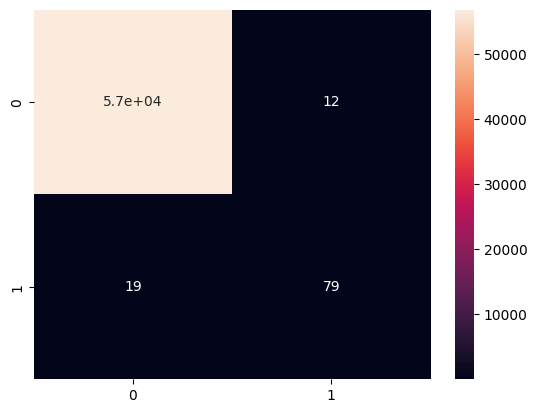

In [12]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.81      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



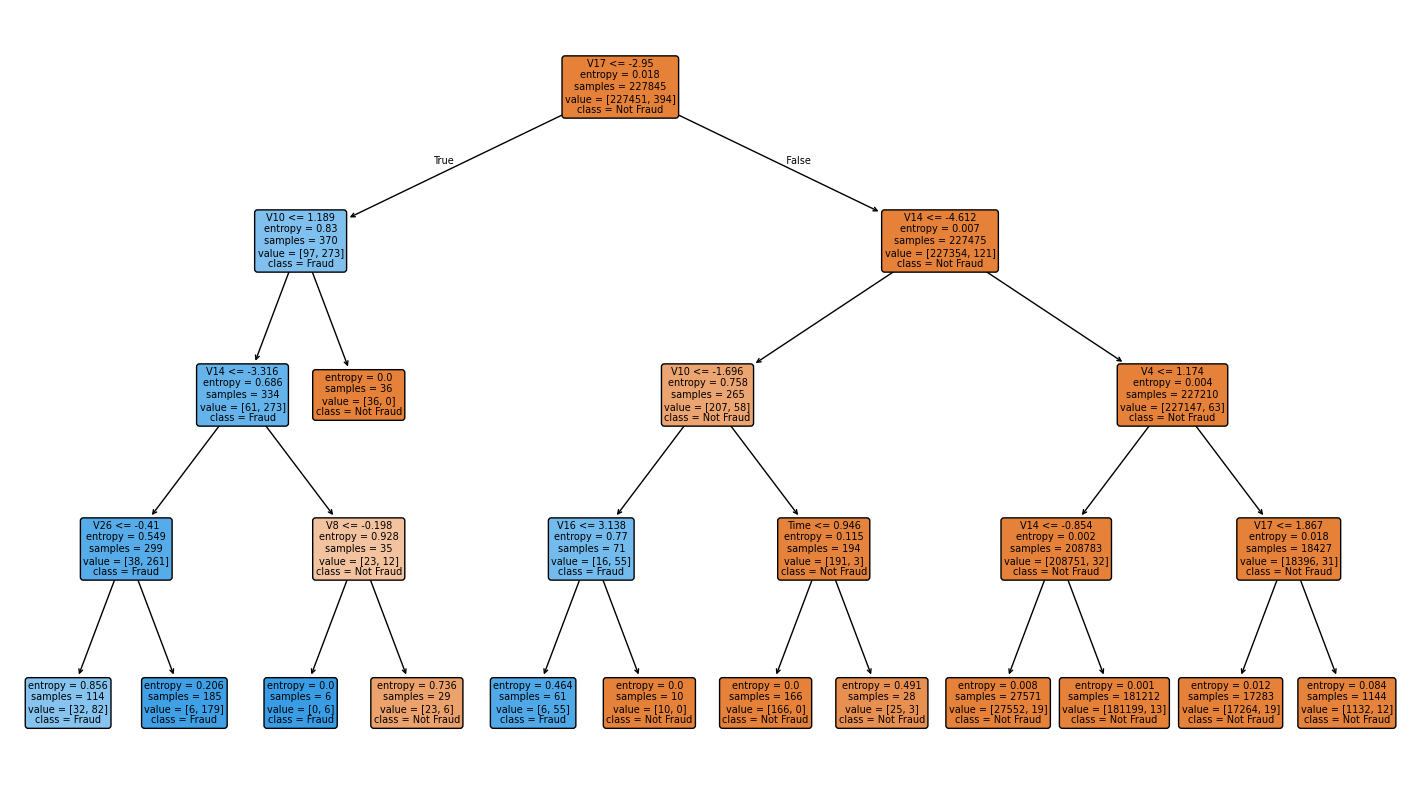

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plot_tree(cl,
          feature_names=x.columns,
          class_names=['Not Fraud','Fraud'],
          filled=True,
          rounded=True
         )
plt.show()

# Using Random Forest

In [14]:
X=df.drop("Class",axis=1)
Y=df['Class']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')
rf.fit(X_train,Y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
Y_pred=rf.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accu=accuracy_score(Y_test,Y_pred)
accu

0.9995611109160493

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[56862,     2],
       [   23,    75]])

In [44]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



<Axes: >

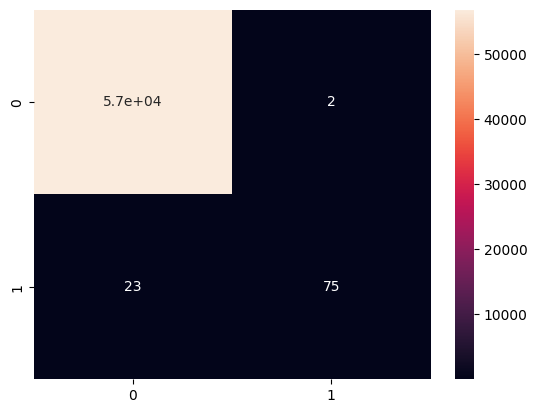

In [45]:
import seaborn as sns
sns.heatmap(cm,annot=True)

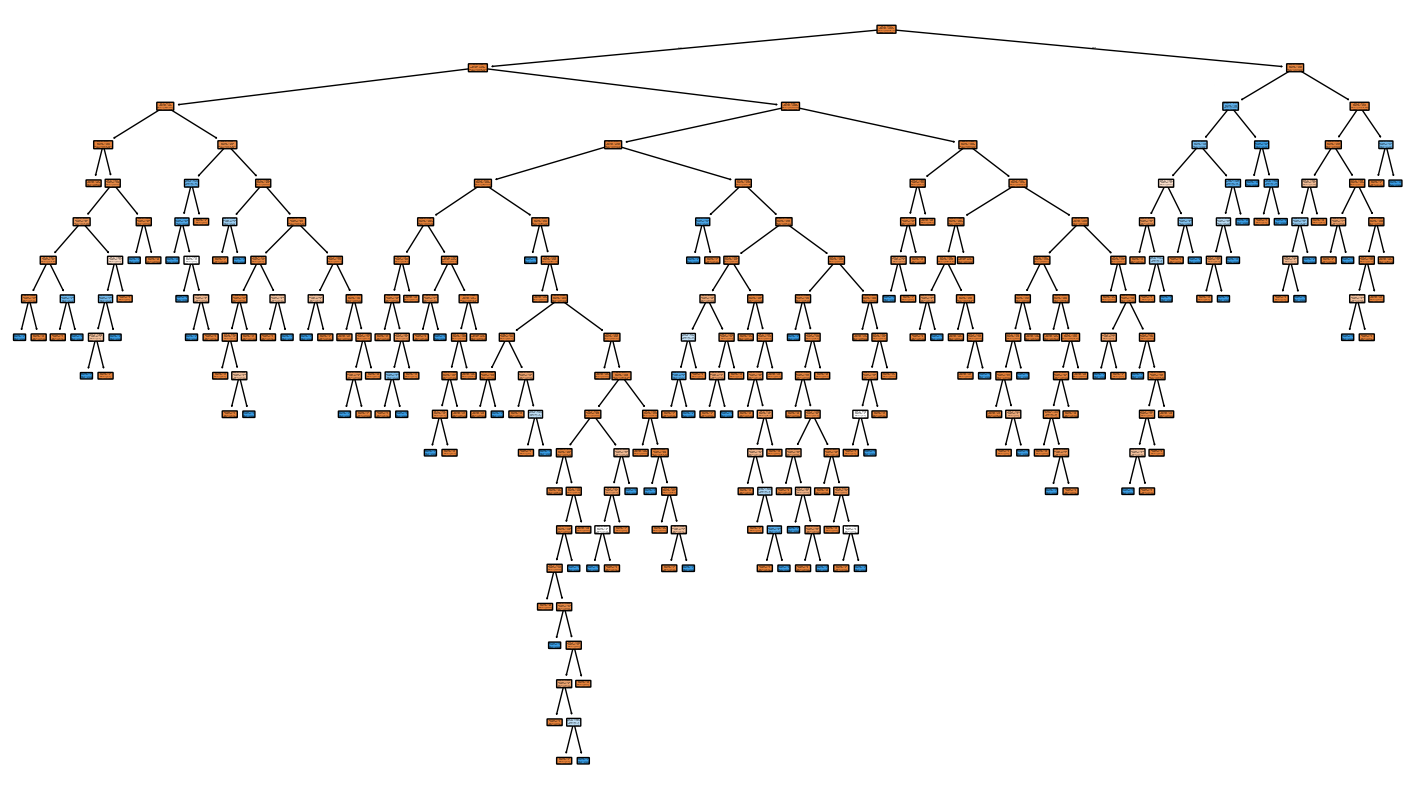

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
single_tree=rf.estimators_[0] #first tree
plt.figure(figsize=(18,10))
plot_tree(
    single_tree,
    feature_names=X.columns,
    class_names=['Not Fraud','Fraud'],
    filled=True,
    rounded=True)
plt.show()

In [47]:
import pandas as pd

new_transaction = pd.DataFrame([{
    "Time": 90000,
    "V1": -3.2,
    "V2": 2.1,
    "V3": -4.0,
    "V4": 3.3,
    "V5": -2.1,
    "V6": -1.4,
    "V7": -3.6,
    "V8": 0.8,
    "V9": -2.9,
    "V10": -4.8,
    "V11": 3.1,
    "V12": -5.6,
    "V13": 0.3,
    "V14": -6.9,
    "V15": -1.2,
    "V16": -3.8,
    "V17": -6.1,
    "V18": -2.3,
    "V19": 1.4,
    "V20": 2.1,
    "V21": 0.9,
    "V22": -0.8,
    "V23": -0.4,
    "V24": 0.2,
    "V25": -1.2,
    "V26": 0.5,
    "V27": 1.3,
    "V28": -0.3,
    "Amount": 2200.00
}])

prediction = rf.predict(new_transaction)
print("Prediction:", "Fraud" if prediction[0] == 1 else "Not Fraud")


Prediction: Fraud


C:\Users\spoor\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [48]:
normal_transaction = pd.DataFrame([{
    "Time": 30000,
    "V1": 0.15,
    "V2": -0.05,
    "V3": 0.7,
    "V4": -0.3,
    "V5": 0.25,
    "V6": -0.1,
    "V7": 0.2,
    "V8": 0.03,
    "V9": 0.4,
    "V10": 0.1,
    "V11": -0.2,
    "V12": 0.5,
    "V13": -0.05,
    "V14": 0.6,
    "V15": 0.1,
    "V16": 0.3,
    "V17": 0.2,
    "V18": -0.1,
    "V19": 0.05,
    "V20": -0.02,
    "V21": 0.04,
    "V22": 0.08,
    "V23": -0.01,
    "V24": 0.15,
    "V25": 0.3,
    "V26": -0.08,
    "V27": 0.01,
    "V28": 0.02,
    "Amount": 35.75
}])

prediction = rf.predict(normal_transaction)
print("Prediction:", "Fraud" if prediction[0] == 1 else "Not Fraud")


Prediction: Not Fraud


C:\Users\spoor\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
